ZOMATO ANALYSIS

In [12]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df = pd.read_csv(r"C:\Users\mohit\Desktop\zomato_project\Zomato_data .csv")
df


,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


In [15]:
def handelrate (value):
    value=str(value).split("/")
    value=value[0];
    return float(value)
df['rate']=df['rate'].apply(handelrate)   
print(df.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


Q1. give me the name of restaurant from where the max people order the food /

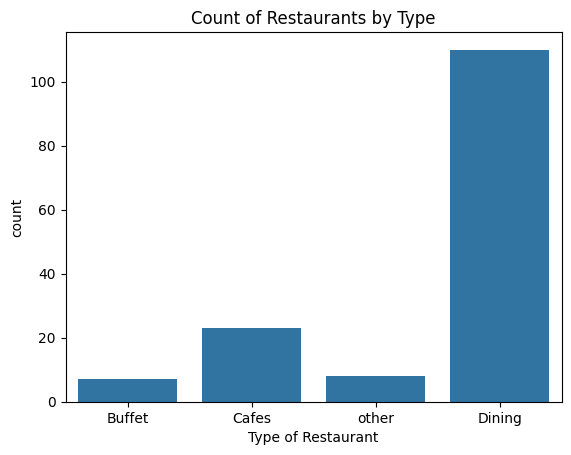

In [17]:
sns.countplot(x=df['listed_in(type)'])
plt.xlabel("Type of Restaurant")
plt.title("Count of Restaurants by Type")
plt.show()

1.Conclusion: as we can see the most of the people Order fom the "Dinning"  

Q2.How many votes each type of  Restaurant recieved from the customer ?

Text(0, 0.5, 'Votes')

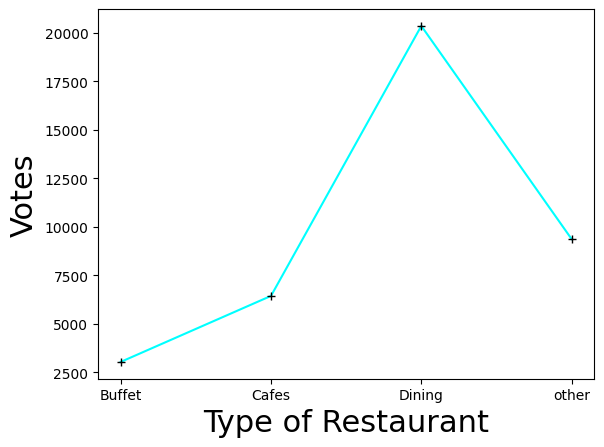

In [43]:
gdata=df.groupby(['listed_in(type)'])["votes"].sum()
result= pd.DataFrame({"votes": gdata})
plt.plot(result,c="cyan",marker="+",mec="black")
plt.xlabel('Type of Restaurant',c="black",size=22)
plt.ylabel('Votes',c="black",size=22)

2.Conclusion : The majority of votes are secured by dinning  approximatly +20000

Q3.  Majority of REstaurant recive the rating


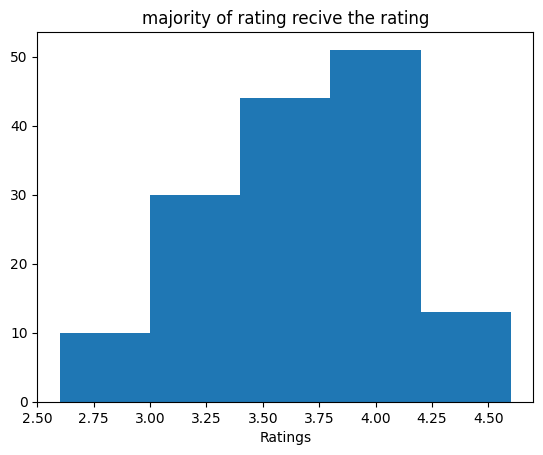

In [50]:
plt.hist(x=df['rate'],bins=5)
plt.xlabel("Ratings")
plt.title("majority of rating recive the rating")
plt.show()

3. Conclusion : The Rating majority of restaurant had recived ranges between 3.50-4.00

Q4. Zomato has observed that most of the couple ordered the food online?
    what is there average spending on the per order ?
    

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

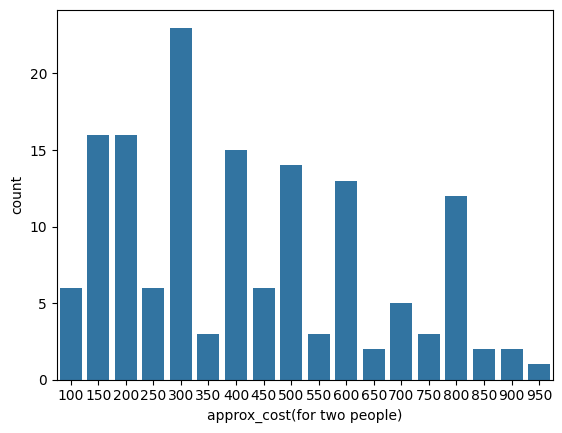

In [89]:
couple_data=df['approx_cost(for two people)']
sns.countplot(x=couple_data)

4. Conclusion : The Average spending of Couple are 300 rupees 

Q5. Which mode (online or offline) have recived maximum rating?

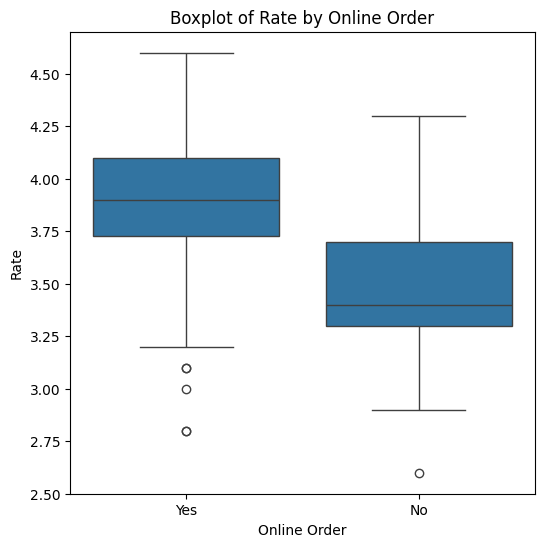

In [72]:
plt.figure(figsize=(6, 6))
sns.boxplot(x='online_order', y='rate', data=df)
plt.title('Boxplot of Rate by Online Order')
plt.xlabel('Online Order')
plt.ylabel('Rate')
plt.show()

5. Conclusion : online mode has recived maximum rating

Q6. which type of resturant recived more offine orderd , so zomato can provide good offer to customers of those restaurant ? 

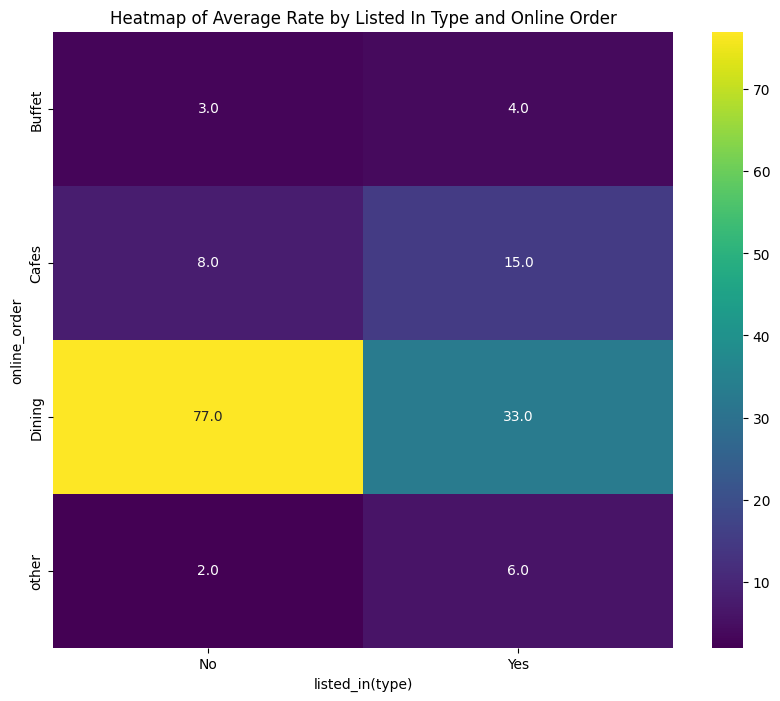

In [86]:
# Create a pivot table
pivot_table = df.pivot_table(index='listed_in(type)', columns='online_order' ,aggfunc='size', fill_value=0)
# Plot a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, annot=True, cmap="viridis", fmt=".1f")
plt.title('Heatmap of Average Rate by Listed In Type and Online Order')
plt.xlabel('listed_in(type)')
plt.ylabel('online_order')
plt.show()

6. Conclusion : Dinning Restaurant had recived more offine order so Zomato has to thing to give more offer to the dinning Restaurants